In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble, linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, PredefinedSplit, RepeatedStratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('ArbuzTrain.csv', index_col='client_id')

# EDA

In [3]:
df.head()

,average_check,number_orders,average_score,items_per_order,is_friend,last_check,last_score,last_scored_after_order_days,last_late_by_minutes,is_last_order_fullfilled,...,items_share_category_19,items_share_category_20,items_share_category_21,items_share_category_22,items_share_category_23,items_share_category_24,items_share_category_25,items_share_category_26,items_share_category_27,is_churn
client_id,,,,,,,,,,,,,,,,,,,,,
301,49300,7,10.0,23.4286,0,9250.0,NaN,NaN,0,1,...,0.0,0.0,0.01,0.0,0.00,0.00,0.01,0.0,0.00,0
9394,58900,7,10.0,5.4286,0,24547.0,NaN,NaN,0,1,...,0.0,0.0,0.00,0.0,0.00,0.03,0.00,0.0,0.00,0
6680,43100,6,10.0,15.3333,0,6017.0,NaN,NaN,0,0,...,0.0,0.0,0.00,0.0,0.00,0.22,0.00,0.0,0.02,0
4774,33900,8,4.0,9.6250,0,7316.0,NaN,NaN,0,1,...,0.0,0.0,0.01,0.0,0.06,0.35,0.00,0.0,0.17,0
2722,37900,9,10.0,14.2222,0,2175.0,10.0,0.0,0,1,...,0.0,0.0,0.00,0.0,0.04,0.22,0.00,0.0,0.01,0


In [4]:
df.describe()

,average_check,number_orders,average_score,items_per_order,is_friend,last_check,last_score,last_scored_after_order_days,last_late_by_minutes,is_last_order_fullfilled,...,items_share_category_19,items_share_category_20,items_share_category_21,items_share_category_22,items_share_category_23,items_share_category_24,items_share_category_25,items_share_category_26,items_share_category_27,is_churn
count,10984.000000,10984.000000,9187.00000,10984.000000,10984.000000,10979.000000,3788.000000,3788.000000,10984.000000,10984.000000,...,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000,10984.000000
mean,60258.749090,16.917243,9.30313,15.744188,0.147942,17799.832376,9.477825,4.650211,1.867170,0.788146,...,0.000066,0.000005,0.000792,0.001331,0.008817,0.233179,0.055713,0.004590,0.034040,0.225692
std,32920.515799,33.871672,1.19325,7.244092,0.355059,13647.604641,1.299503,11.796057,10.355236,0.408640,...,0.000933,0.000252,0.003546,0.006559,0.015732,0.138920,0.063893,0.016567,0.031593,0.418056
min,0.000000,6.000000,2.00000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38000.000000,8.000000,9.00000,10.800000,0.000000,8795.000000,10.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.020000,0.000000,0.010000,0.000000
50%,52100.000000,12.000000,9.94120,14.666700,0.000000,13862.000000,10.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.040000,0.000000,0.030000,0.000000
75%,73100.000000,20.000000,10.00000,19.737475,0.000000,22354.000000,10.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.320000,0.080000,0.000000,0.050000,0.000000
max,419000.000000,3251.000000,10.00000,65.857100,1.000000,202298.000000,10.000000,206.000000,478.000000,1.000000,...,0.030000,0.020000,0.100000,0.190000,0.470000,1.000000,0.950000,0.750000,0.400000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10984 entries, 301 to 10975
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   average_check                 10984 non-null  int64  
 1   number_orders                 10984 non-null  int64  
 2   average_score                 9187 non-null   float64
 3   items_per_order               10984 non-null  float64
 4   is_friend                     10984 non-null  int64  
 5   last_check                    10979 non-null  float64
 6   last_score                    3788 non-null   float64
 7   last_scored_after_order_days  3788 non-null   float64
 8   last_late_by_minutes          10984 non-null  int64  
 9   is_last_order_fullfilled      10984 non-null  int64  
 10  items_share_category_1        10984 non-null  float64
 11  items_share_category_2        10984 non-null  float64
 12  items_share_category_3        10984 non-null  float64
 13 

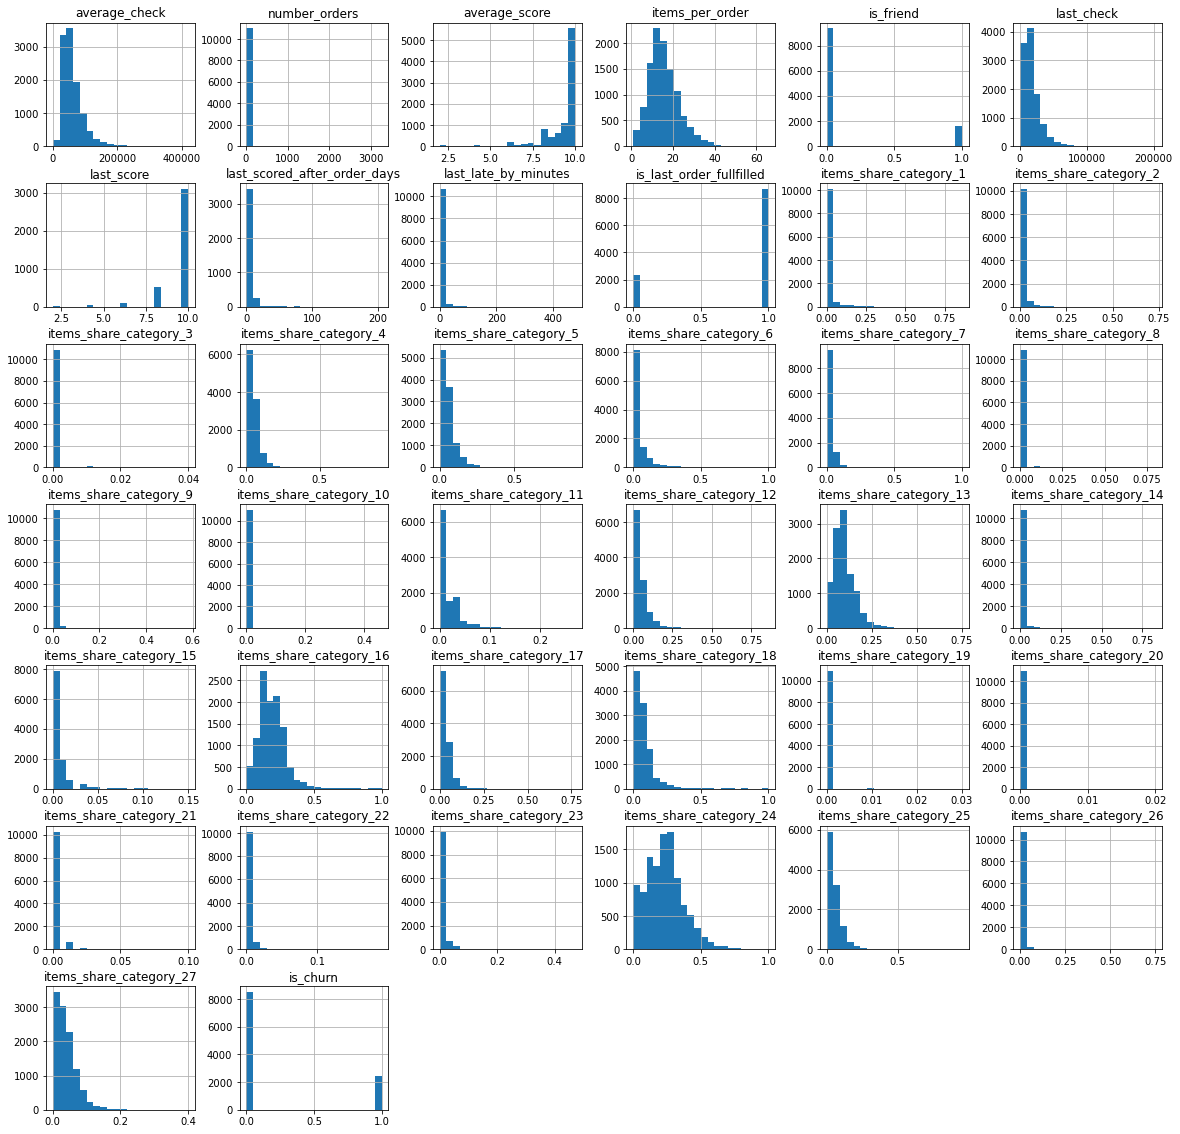

In [6]:
df.hist(figsize=(20,20), bins=20)
plt.show()

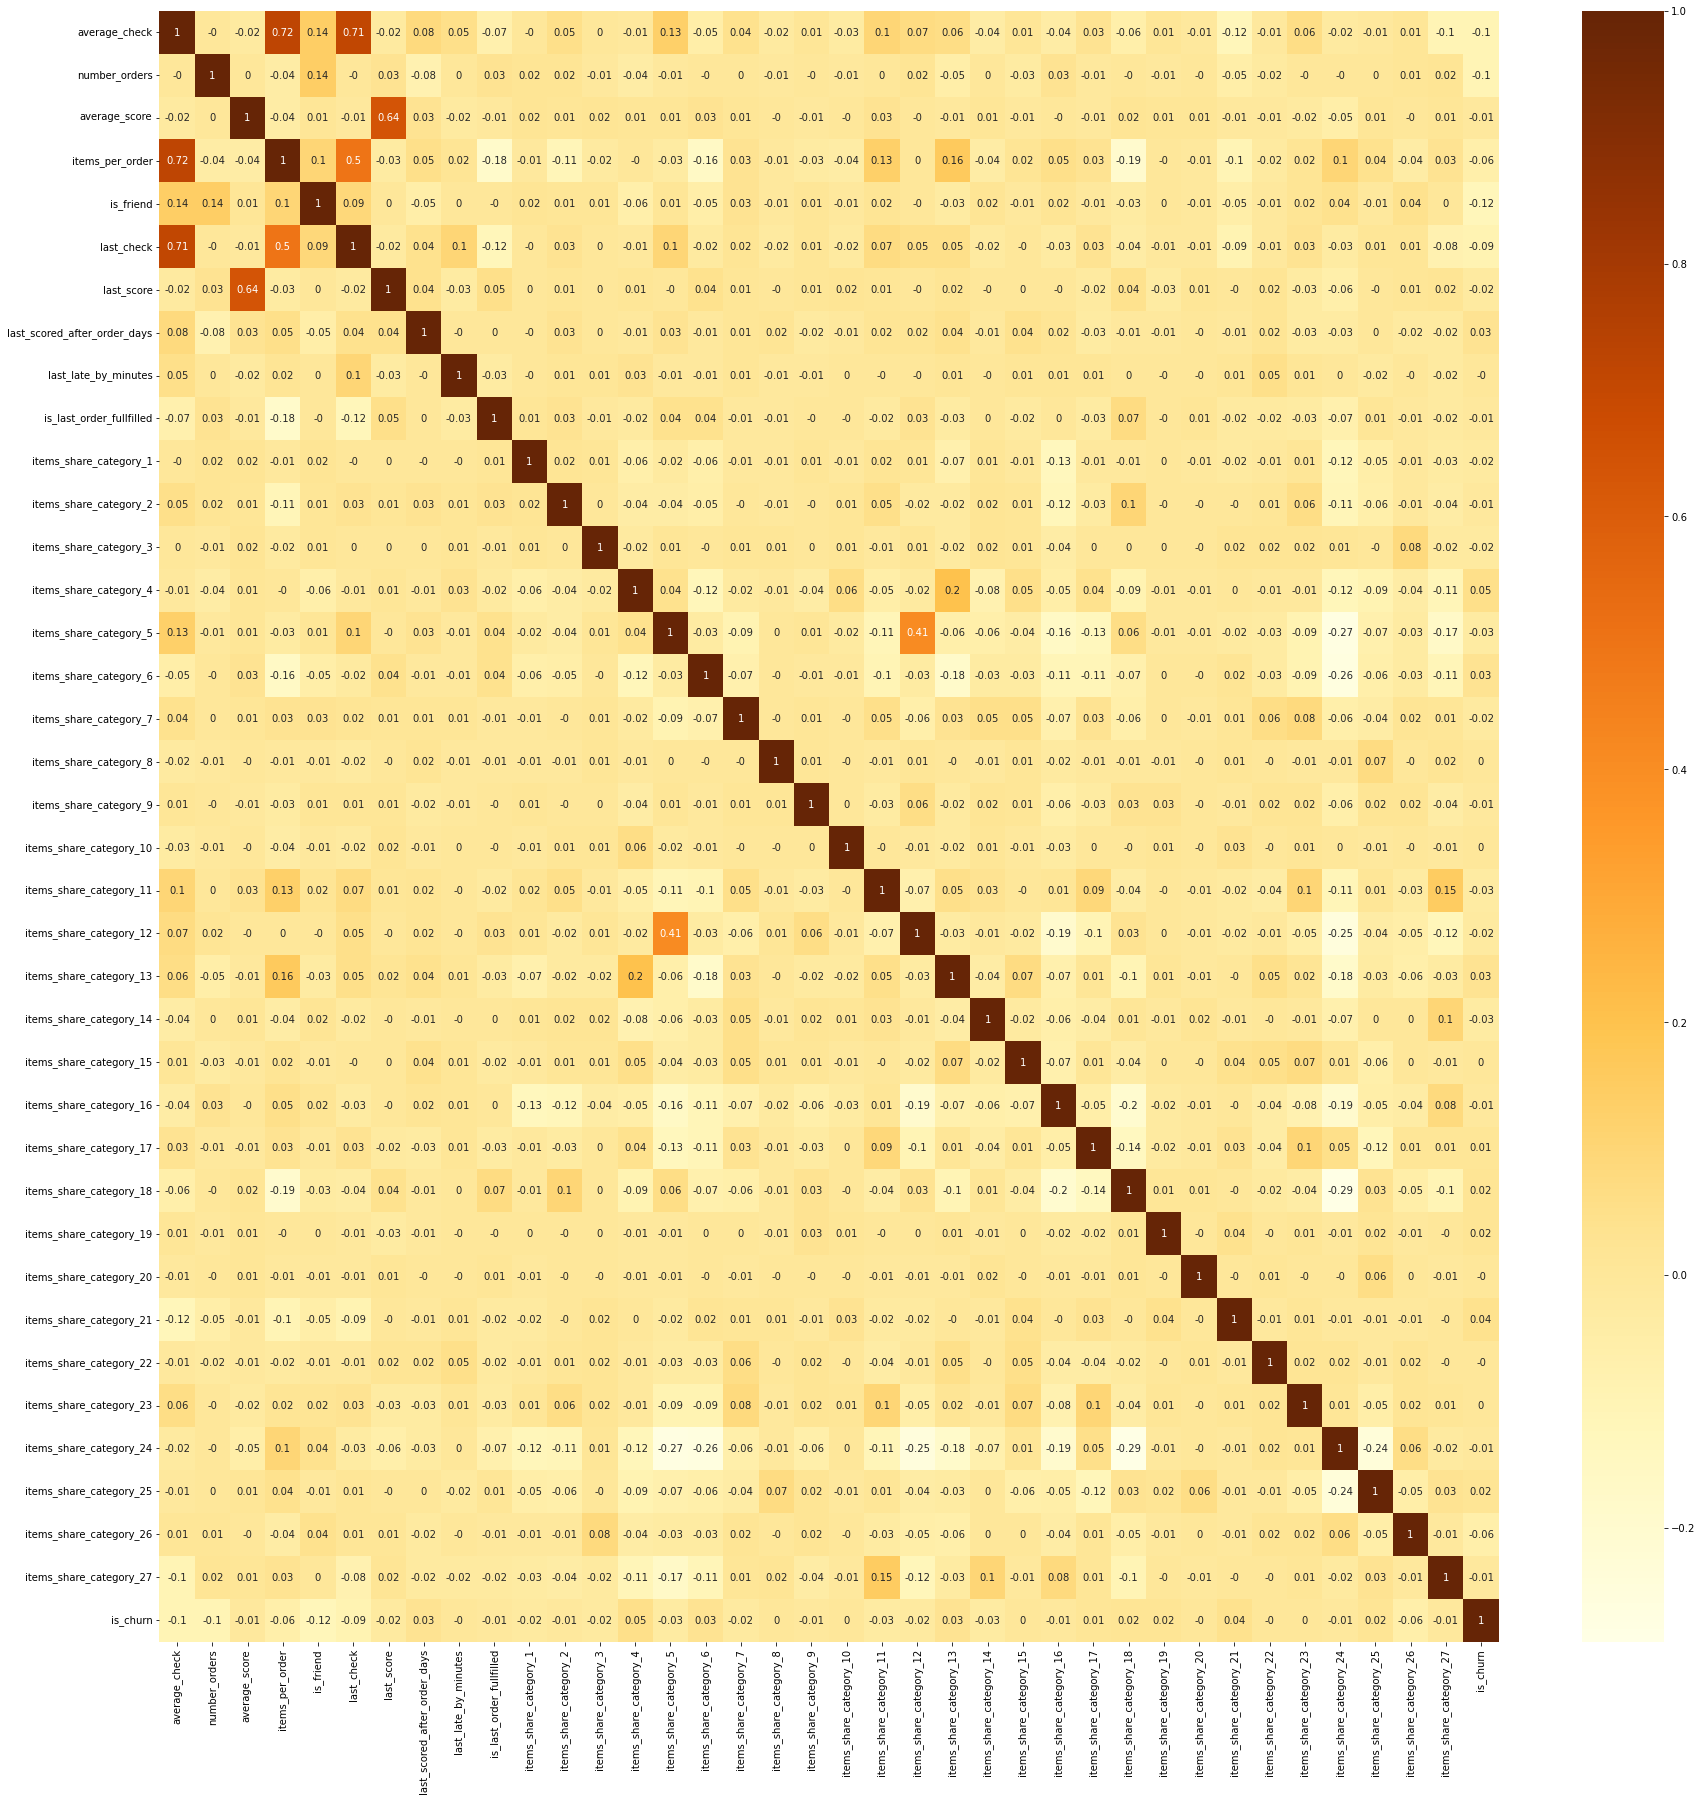

In [7]:
correlation = df.corr().round(2)
plt.figure(figsize = (30,30))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')
plt.show()

<AxesSubplot:xlabel='last_score', ylabel='Count'>

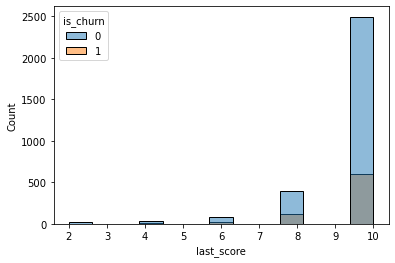

In [8]:
sns.histplot(x='last_score', hue='is_churn', data=df)

<AxesSubplot:xlabel='is_friend', ylabel='count'>

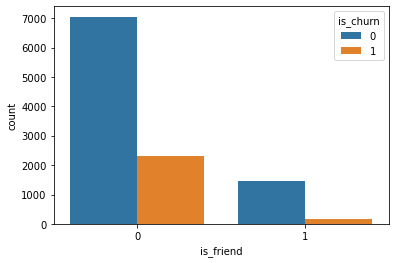

In [9]:
sns.countplot(x='is_friend', hue='is_churn', data=df)

## Testing Feature Engineering

### Data Imputaion

In [10]:
def perform_imputation(df):
    df['average_score']                 = df['average_score'].fillna(df['average_score'].mean())
    df['last_score']                    = df['last_score'].fillna(df['last_score'].median())
    df['last_check']                    = df['last_check'].fillna(df['last_check'].mean())
    df['last_scored_after_order_days']  = df['last_scored_after_order_days'].fillna(df['last_scored_after_order_days'].mean())

perform_imputation(df)

In [11]:
X = df.drop('is_churn', axis=1)
y = df.is_churn

# X['total_sum'] = X.number_orders * X.average_check
# X = df.iloc[:, :10]

### Feature Engineering

In [12]:
# dfi                     = df.drop('is_churn', axis=1)
# dfi['total_sum']        = df.number_orders * df.average_check
# dfi['lscore_diff']      = df.average_score - df.last_score[df.last_score > -1]
# dfi['ave_item_price']   = df.average_check / df.items_per_order
# df_itemless['expensive_share']  = df.iloc[:, [11, 14, 20, 21, 22, 32]].sum(axis=1)
# df_itemless['cheap_share']      = df.iloc[:, [15, 27, 30, 36]].sum(axis=1)
# df_itemless['mean_share']       = 1 - df_itemless['expensive_share'] - df_itemless['cheap_share']

# dfi['is_churn']         = df.iloc[:, -1]

In [13]:
def perform_fe_hand(df):
    df['total_sum']        = df.number_orders * df.average_check
    df['expensive_share']  = df.iloc[:, [11, 14, 20, 21, 22, 32]].sum(axis=1)
    df['cheap_share']      = df.iloc[:, [15, 27, 30, 36]].sum(axis=1)
    df['mean_share']       = 1 - df['expensive_share'] - df['cheap_share']

perform_fe_hand(X)

### Feature Engineering using FeatureTools

In [14]:
import featuretools as ft

In [15]:
def perform_fe(X):
    es = ft.EntitySet(id = 'churn')

    variable_types = {'is_friend': ft.variable_types.variable.Boolean,
                    'is_last_order_fullfilled': ft.variable_types.variable.Boolean,
                    'last_score': ft.variable_types.variable.Ordinal}
    # adding a dataframe 
    es.entity_from_dataframe(entity_id = 'data', dataframe = X, variable_types=variable_types, index = 'client_id')

    feature_matrix, feature_names = ft.dfs(entityset=es, 
                                           target_entity = 'data', 
                                           trans_primitives = ['add_numeric', 'multiply_numeric', 'greater_than_equal_to'], 
                                           n_jobs = -1)
       
    return feature_matrix

# X = perform_fe(X)

In [16]:
X.shape

(10984, 41)

# Modelling

For Testing with scaling

In [17]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X, y)

Splitting the data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

Using Predefined Split for GridSearchCV

In [19]:
X_ps = np.concatenate((X_train, X_test))
y_ps = np.concatenate((y_train, y_test))

train = np.full_like(y_train, -1)
test  = np.zeros_like(y_test)

split = np.concatenate((train, test))

ps = PredefinedSplit(split)

Balancing

In [20]:
ros     = RandomOverSampler(random_state=42)
rou     = RandomUnderSampler(random_state=42)
smote   = SMOTE(random_state=42)

# X_train, y_train = ros.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='is_churn', ylabel='count'>

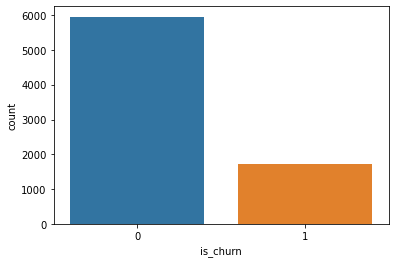

In [21]:
sns.countplot(x=y_train)

## Using Different Models

### Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

predictions = gnb.predict(X_test)
print(classification_report(y_test, predictions))
print(f1_score(y_test, predictions, average='macro'))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62      2552
           1       0.31      0.80      0.44       744

    accuracy                           0.55      3296
   macro avg       0.60      0.63      0.53      3296
weighted avg       0.76      0.55      0.58      3296

0.5290214431529333


### Decision Tree

In [52]:
isGSearch   = True
isPS        = True

if isGSearch:
    param_grid = {'min_samples_split':  [2, 3, 4, 5, 6, 8], 
                  'max_depth':          [3, 4, 6, 9],
                  }

    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    if isPS:
        gridDecisionTree = GridSearchCV(estimator = model, scoring='f1_macro', param_grid = param_grid, cv = ps, n_jobs=-1)
        gridDecisionTree.fit(X_ps, y_ps)
    else:
        gridDecisionTree = GridSearchCV(estimator = model, scoring='f1_macro', param_grid = param_grid, cv = 5, n_jobs=-1)
        gridDecisionTree.fit(X_train, y_train)

    print(gridDecisionTree.best_params_)

    decision_tree = gridDecisionTree.best_estimator_
else:
    min_samples_split = 5
    max_depth = 3
    decision_tree = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=max_depth, random_state=42, class_weight='balanced')

{'max_depth': 3, 'min_samples_split': 2}


In [51]:
decision_tree.fit(X_train, y_train)

predictions = decision_tree.predict(X_test)
print(classification_report(y_test, predictions, digits=5))
print(f1_score(y_test, predictions, average='macro'))

              precision    recall  f1-score   support

           0    0.87109   0.62226   0.72594      2552
           1    0.34555   0.68414   0.45918       744

    accuracy                        0.63623      3296
   macro avg    0.60832   0.65320   0.59256      3296
weighted avg    0.75246   0.63623   0.66573      3296

0.5925609639796379


In [25]:
pd.Series(decision_tree.feature_importances_, index = X.columns).sort_values(ascending = False)

number_orders                   0.835949
total_sum                       0.132231
last_check                      0.031820
items_share_category_21         0.000000
items_share_category_14         0.000000
items_share_category_15         0.000000
items_share_category_16         0.000000
items_share_category_17         0.000000
items_share_category_18         0.000000
items_share_category_19         0.000000
items_share_category_20         0.000000
average_check                   0.000000
items_share_category_22         0.000000
items_share_category_13         0.000000
items_share_category_24         0.000000
items_share_category_25         0.000000
items_share_category_26         0.000000
items_share_category_27         0.000000
expensive_share                 0.000000
cheap_share                     0.000000
items_share_category_23         0.000000
items_share_category_11         0.000000
items_share_category_12         0.000000
items_share_category_1          0.000000
average_score   

### Random Forest

In [26]:
isPS = True

param_grid = {'min_samples_split': np.array([3, 4, 5, 6, 8, 10, 13]), 
               'max_depth': np.array([3, 5, 6, 8, 10, 14, 18]),
               }

model = ensemble.RandomForestClassifier(class_weight='balanced')

if isPS:
    gridRF = GridSearchCV(estimator = model, scoring='f1_macro', param_grid = param_grid, cv = ps, n_jobs=-1)
    gridRF.fit(X_ps, y_ps)
else:
    gridRF = GridSearchCV(estimator = model, scoring='f1_macro', param_grid = param_grid, cv = 5, n_jobs=-1)
    gridRF.fit(X_train, y_train)

print(gridRF.best_params_)

RF = gridRF.best_estimator_

{'max_depth': 14, 'min_samples_split': 8}


In [27]:
RF.fit(X_train, y_train)

predictions = RF.predict(X_test)
print(classification_report(y_test, predictions, digits=5))
print(f1_score(y_test, predictions, average='macro'))

              precision    recall  f1-score   support

           0    0.84042   0.81309   0.82653      2552
           1    0.42322   0.47043   0.44558       744

    accuracy                        0.73574      3296
   macro avg    0.63182   0.64176   0.63605      3296
weighted avg    0.74625   0.73574   0.74054      3296

0.6360523230820117


In [28]:
pd.Series(RF.feature_importances_, index = X.columns).sort_values(ascending = False)

number_orders                   0.145214
total_sum                       0.136212
average_check                   0.052286
last_check                      0.052188
items_per_order                 0.043603
expensive_share                 0.032326
items_share_category_16         0.031939
items_share_category_24         0.031017
cheap_share                     0.030560
mean_share                      0.029462
items_share_category_13         0.028236
items_share_category_25         0.027447
items_share_category_5          0.027147
items_share_category_18         0.026135
items_share_category_12         0.026126
items_share_category_4          0.026058
average_score                   0.023041
items_share_category_27         0.021247
items_share_category_6          0.019714
items_share_category_7          0.019669
items_share_category_17         0.019325
last_scored_after_order_days    0.016898
items_share_category_11         0.016819
items_share_category_26         0.013459
is_friend       

### ExtraTrees

In [29]:
isGSearch   = True
isPS        = True

if isGSearch:
    param_grid = {'min_samples_split':  [2, 4, 6, 8, 10, 14],
                  'max_depth' :         [3, 5, 6, 8, 10, 13],}

    model = ensemble.ExtraTreesClassifier(random_state=42, class_weight='balanced')

    if isPS:
        gridEXT = GridSearchCV(estimator=model, scoring='f1_macro', param_grid = param_grid, cv = ps, n_jobs=-1, verbose=4)
        gridEXT.fit(X_ps, y_ps)
    else:
        gridEXT = GridSearchCV(estimator=model, scoring='f1_macro', param_grid = param_grid, cv = 5, n_jobs=-1, verbose=4)
        gridEXT.fit(X_train, y_train)
    
    print(gridEXT.best_params_)

    EXT = gridEXT.best_estimator_
else:
    min_splits = 10
    max_depth = 15
    EXT = ensemble.ExtraTreesClassifier(min_samples_split=min_splits, max_depth=max_depth, class_weight='balanced')

Fitting 1 folds for each of 36 candidates, totalling 36 fits
{'max_depth': 13, 'min_samples_split': 2}


In [30]:
EXT.fit(X_train, y_train)

predictions = EXT.predict(X_test)
print(classification_report(y_test, predictions, digits=5))
print(f1_score(y_test, predictions, average='macro'))

              precision    recall  f1-score   support

           0    0.87910   0.62970   0.73379      2552
           1    0.35627   0.70296   0.47288       744

    accuracy                        0.64624      3296
   macro avg    0.61768   0.66633   0.60333      3296
weighted avg    0.76108   0.64624   0.67489      3296

0.6033325901888413


In [31]:
pd.Series(EXT.feature_importances_, index = X.columns).sort_values(ascending = False)

number_orders                   0.155445
total_sum                       0.150411
is_friend                       0.102154
last_check                      0.030348
items_share_category_4          0.028006
average_check                   0.027232
items_share_category_13         0.025474
items_share_category_5          0.025261
items_share_category_12         0.025060
items_per_order                 0.024978
expensive_share                 0.020990
items_share_category_26         0.019897
items_share_category_25         0.018965
items_share_category_24         0.018819
mean_share                      0.018483
cheap_share                     0.018395
items_share_category_27         0.017362
items_share_category_16         0.016990
items_share_category_6          0.016343
average_score                   0.015782
items_share_category_7          0.015289
items_share_category_11         0.015089
items_share_category_17         0.015059
items_share_category_18         0.014927
items_share_cate

### AdaBoost

In [32]:
ada = ensemble.AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'), learning_rate=1,  n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

predictions = ada.predict(X_test)
print(classification_report(y_test, predictions, digits=5))
print(f1_score(y_test, predictions, average='macro'))

              precision    recall  f1-score   support

           0    0.87705   0.62892   0.73254      2552
           1    0.35402   0.69758   0.46968       744

    accuracy                        0.64442      3296
   macro avg    0.61554   0.66325   0.60111      3296
weighted avg    0.75899   0.64442   0.67321      3296

0.6011127380418867


### XGBoost

In [33]:
from xgboost import XGBClassifier

In [34]:
xgb = XGBClassifier(n_estimators=50, eval_metric='auc', scale_pos_weight=5, early_stopping_rounds=5,)
xgb.fit(X_train, y_train, eval_set=[( X_test, y_test)])

predictions = xgb.predict(X_test)
print(classification_report(y_test, predictions, digits=5))
print(f1_score(y_test, predictions, average='macro'))

[0]	validation_0-auc:0.68379
[1]	validation_0-auc:0.69841
[2]	validation_0-auc:0.70427
[3]	validation_0-auc:0.70599
[4]	validation_0-auc:0.70808
[5]	validation_0-auc:0.71146
[6]	validation_0-auc:0.71024
[7]	validation_0-auc:0.70849
[8]	validation_0-auc:0.70263
[9]	validation_0-auc:0.70184
              precision    recall  f1-score   support

           0    0.88657   0.54820   0.67748      2552
           1    0.32887   0.75941   0.45898       744

    accuracy                        0.59587      3296
   macro avg    0.60772   0.65380   0.56823      3296
weighted avg    0.76068   0.59587   0.62816      3296

0.5682291410554225


In [35]:
pd.Series(xgb.feature_importances_, index = X.columns).sort_values(ascending = False)

number_orders                   0.235062
total_sum                       0.039823
is_last_order_fullfilled        0.034051
last_scored_after_order_days    0.028404
items_share_category_25         0.025795
expensive_share                 0.025668
items_share_category_22         0.023516
items_share_category_26         0.022875
items_share_category_15         0.022816
items_share_category_5          0.022470
items_share_category_23         0.022142
last_check                      0.021506
items_share_category_14         0.021029
is_friend                       0.020824
items_share_category_3          0.020823
items_share_category_10         0.020645
items_share_category_9          0.020060
average_score                   0.019523
items_share_category_12         0.019411
items_share_category_8          0.019406
cheap_share                     0.019164
items_share_category_11         0.018929
items_per_order                 0.018736
average_check                   0.018572
items_share_cate

### SVM

In [36]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(), svm.SVC(kernel="linear", class_weight='balanced', cache_size=1000))

In [37]:
svc.fit(X_train, y_train)

predictions = svc.predict(X_test)
print(classification_report(y_test, predictions, digits=5))
print(f1_score(y_test, predictions, average='macro'))

              precision    recall  f1-score   support

           0    0.91101   0.48942   0.63676      2552
           1    0.32312   0.83602   0.46609       744

    accuracy                        0.56766      3296
   macro avg    0.61707   0.66272   0.55142      3296
weighted avg    0.77831   0.56766   0.59823      3296

0.5514248764169231


# Submission

In [38]:
test_set = pd.read_csv('ArbuzTest.csv', index_col='client_id')

In [39]:
client_id = test_set.index

In [40]:
perform_imputation(test_set)

In [41]:
perform_fe_hand(test_set)
# test_set = perform_fe(test_set)

In [42]:
test_set.head()

,average_check,number_orders,average_score,items_per_order,is_friend,last_check,last_score,last_scored_after_order_days,last_late_by_minutes,is_last_order_fullfilled,...,items_share_category_22,items_share_category_23,items_share_category_24,items_share_category_25,items_share_category_26,items_share_category_27,total_sum,expensive_share,cheap_share,mean_share
client_id,,,,,,,,,,,,,,,,,,,,,
5733,53500,9,10.0000,18.5556,1,9590.0,10.0,4.847368,0,1,...,0.00,0.01,0.35,0.01,0.00,0.02,481500,0.24,0.11,0.65
1559,41800,31,8.0000,11.3548,0,4839.0,8.0,12.000000,0,1,...,0.01,0.02,0.38,0.01,0.01,0.03,1295800,0.26,0.10,0.64
8709,137900,12,10.0000,31.7500,0,33861.0,10.0,6.000000,0,1,...,0.00,0.02,0.35,0.09,0.00,0.00,1654800,0.18,0.07,0.75
659,26700,27,10.0000,10.7407,0,8130.0,10.0,0.000000,0,1,...,0.00,0.02,0.08,0.10,0.00,0.04,720900,0.32,0.20,0.48
11662,31900,16,8.7273,8.8750,0,11428.0,10.0,2.000000,0,1,...,0.00,0.02,0.24,0.01,0.00,0.00,510400,0.29,0.17,0.54


In [43]:
predictions = RF.predict(test_set)

In [46]:
submission = pd.DataFrame({'client_id':client_id, 'is_churn':predictions})

In [47]:
# submission.to_csv('submissionRF.csv', index=False)

In [48]:
submission.tail()

,client_id,is_churn
2742,948,1
2743,6983,0
2744,8864,0
2745,8877,0
2746,13633,0


In [49]:
submission.is_churn.value_counts()

0    2136
1     611
Name: is_churn, dtype: int64